# Machine Learning Techniques

Decision Tree Classification

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [6]:
vgresult = pd.read_csv('vgsales-cluster.csv')

Genre
Role-Playing    7
Platform        6
Sports          4
Racing          4
Action          4
Shooter         3
Simulation      1
Name: count, dtype: int64


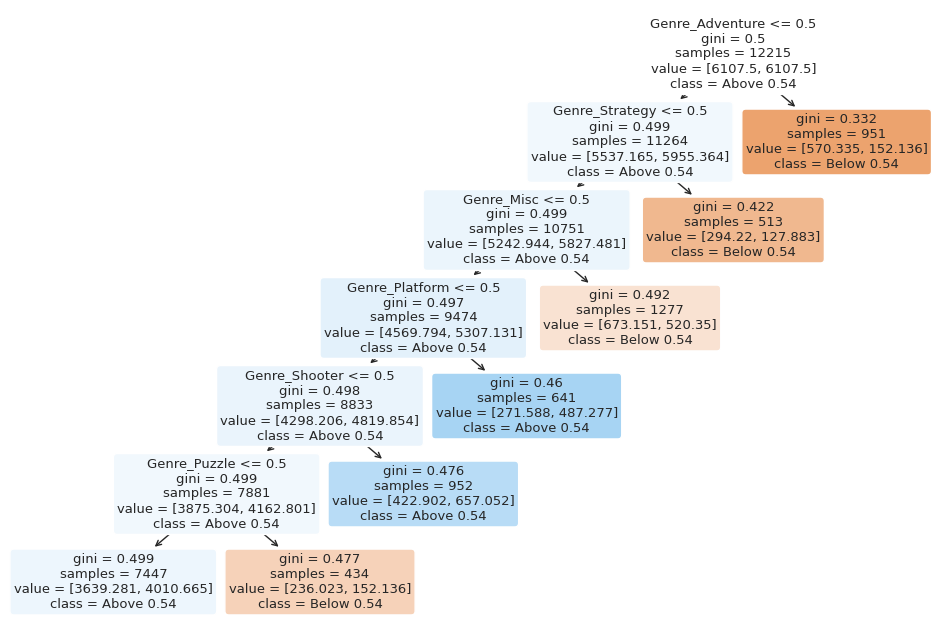

Goodness of Fit of Model 	Train Dataset
Classification Accuracy on Train Dataset: 0.41596397871469504
True Negative: 2743
False Positive: 6702
False Negative: 432
True Positive: 2338
True Positive Rate: 0.844043321299639
False Positive Rate: 0.155956678700361

Goodness of Fit of Model 	Test Dataset
Classification Accuracy on Test Dataset: 0.41355599214145383
True Negative: 889
False Positive: 2252
False Negative: 136
True Positive: 795
True Positive Rate: 0.8539205155746509
False Positive Rate: 0.1460794844253491


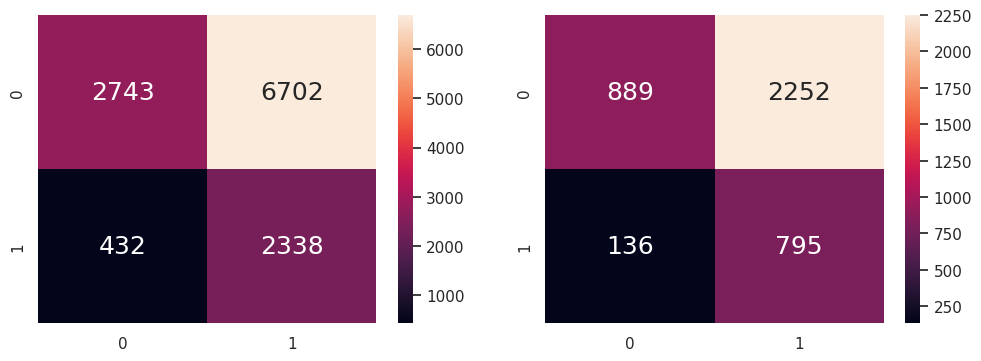

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Prepare the data
X = pd.get_dummies(vgresult[['Genre']])
y = (vgresult['Global_Sales'] >= 0.54).astype(int)  # 1 if sales is above 0.54, 0 otherwise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

# Train the decision tree classifier with class weights

dectree = DecisionTreeClassifier(max_depth=6, random_state=42, class_weight='balanced')
dectree.fit(X_train, y_train)

# Make predictions
y_pred = dectree.predict(X)


# Add the predicted class to the DataFrame
vgresult.loc[:, 'Sales_Class'] = y_pred

true_positives = vgresult[(vgresult['Sales_Class'] == 1) & (y == 1) & (vgresult['Cluster'] == 2)]

# Count the occurrences of each genre
genre_counts_above_054 = true_positives['Genre'].value_counts()

# Print the total count of each genre classified as true positives
print(genre_counts_above_054)

feature_names = X.columns.tolist()

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dectree, filled=True, rounded=True, feature_names=feature_names, class_names=["Below 0.54", "Above 0.54"])
plt.show()

# Check the Goodness of Fit (on Train Data)
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy on Train Dataset:", dectree.score(X_train, y_train))

tn3, fp3, fn3, tp3 = confusion_matrix(y_train, y_train_pred).ravel()
TPR3 = tp3/(tp3+fn3)
FNR3 = fn3/(tp3+fn3) 

print("True Negative:", tn3)
print("False Positive:", fp3)
print("False Negative:", fn3)
print("True Positive:", tp3)

print("True Positive Rate:", TPR3)
print("False Positive Rate:", FNR3)
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy on Test Dataset:", dectree.score(X_test, y_test))

tn3test, fp3test, fn3test, tp3test = confusion_matrix(y_test, y_test_pred).ravel()
TPR3test = tp3test/(tp3test+fn3test)
FNR3test = fn3test/(tp3test+fn3test) 

print("True Negative:", tn3test)
print("False Positive:", fp3test)
print("False Negative:", fn3test)
print("True Positive:", tp3test)

print("True Positive Rate:", TPR3test)
print("False Positive Rate:", FNR3test)

# Confusion matrix
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])
plt.show()


Random Forest Classification

Genre
Role-Playing    7
Platform        6
Sports          4
Racing          4
Action          4
Shooter         3
Simulation      1
Name: count, dtype: int64

Goodness of Fit of Random Forest Model 	Train Dataset
Classification Accuracy on Train Dataset: 0.4460908718788375
True Negative: 3246
False Positive: 6199
False Negative: 567
True Positive: 2203
True Positive Rate: 0.7953068592057762
False Positive Rate: 0.20469314079422382

Goodness of Fit of Random Forest Model 	Test Dataset
Classification Accuracy on Test Dataset: 0.44720039292730845
True Negative: 1062
False Positive: 2079
False Negative: 172
True Positive: 759
True Positive Rate: 0.8152524167561761
False Positive Rate: 0.18474758324382384


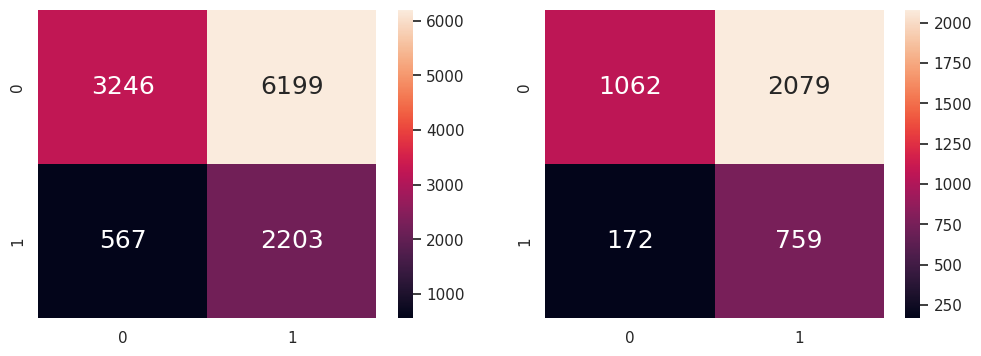

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Train the random forest classifier
forest = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42, class_weight='balanced')
forest.fit(X_train, y_train)

# Make predictions
y_pred_forest = forest.predict(X)

# Add the predicted class to the DataFrame
vgresult.loc[:,'Sales_Class_Forest'] = y_pred_forest

true_positives = vgresult[(vgresult['Sales_Class'] == 1) & (y == 1)& (vgresult['Cluster'] == 2)]

# Count the occurrences of each genre
genre_counts_above_054_forest = true_positives['Genre'].value_counts()

# Print the total count of each genre classified as true positives
print(genre_counts_above_054_forest)

# Check the Goodness of Fit (on Train Data)
y_train_pred_forest = forest.predict(X_train)
y_test_pred_forest = forest.predict(X_test)

print()
print("Goodness of Fit of Random Forest Model \tTrain Dataset")
print("Classification Accuracy on Train Dataset:", forest.score(X_train, y_train))

tn_forest, fp_forest, fn_forest, tp_forest = confusion_matrix(y_train, y_train_pred_forest).ravel()
TPR_forest = tp_forest / (tp_forest + fn_forest)
FNR_forest = fn_forest / (tp_forest + fn_forest)

print("True Negative:", tn_forest)
print("False Positive:", fp_forest)
print("False Negative:", fn_forest)
print("True Positive:", tp_forest)

print("True Positive Rate:", TPR_forest)
print("False Positive Rate:", FNR_forest)
print()

print("Goodness of Fit of Random Forest Model \tTest Dataset")
print("Classification Accuracy on Test Dataset:", forest.score(X_test, y_test))

tn_test_forest, fp_test_forest, fn_test_forest, tp_test_forest = confusion_matrix(y_test, y_test_pred_forest).ravel()
TPR_test_forest = tp_test_forest / (tp_test_forest + fn_test_forest)
FNR_test_forest = fn_test_forest / (tp_test_forest + fn_test_forest)

print("True Negative:", tn_test_forest)
print("False Positive:", fp_test_forest)
print("False Negative:", fn_test_forest)
print("True Positive:", tp_test_forest)

print("True Positive Rate:", TPR_test_forest)
print("False Positive Rate:", FNR_test_forest)

# Confusion matrix
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred_forest), annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred_forest), annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])
plt.show()


Visualizing the genre that the model has predicted the true positive over the year

In [9]:
genre_counts_above_054_forest_df = genre_counts_above_054_forest.reset_index()
true_positive = vgresult[vgresult['Genre'].isin(genre_counts_above_054_forest_df['Genre']) & (vgresult['Cluster'] == 2)]
true_positive

,Unnamed: 0.1,Unnamed: 0,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Cluster,Sales_Class,Sales_Class_Forest
0,0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2,1,1
1,1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,2,1,1
2,2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2,1,1
3,3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2,1,1
4,4,4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,2,1,1
6,6,6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,2,1,1
8,8,8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,2,1,1
9,9,9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,2,1,1
10,10,10,11,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76,2,1,0
11,11,11,12,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42,2,1,1


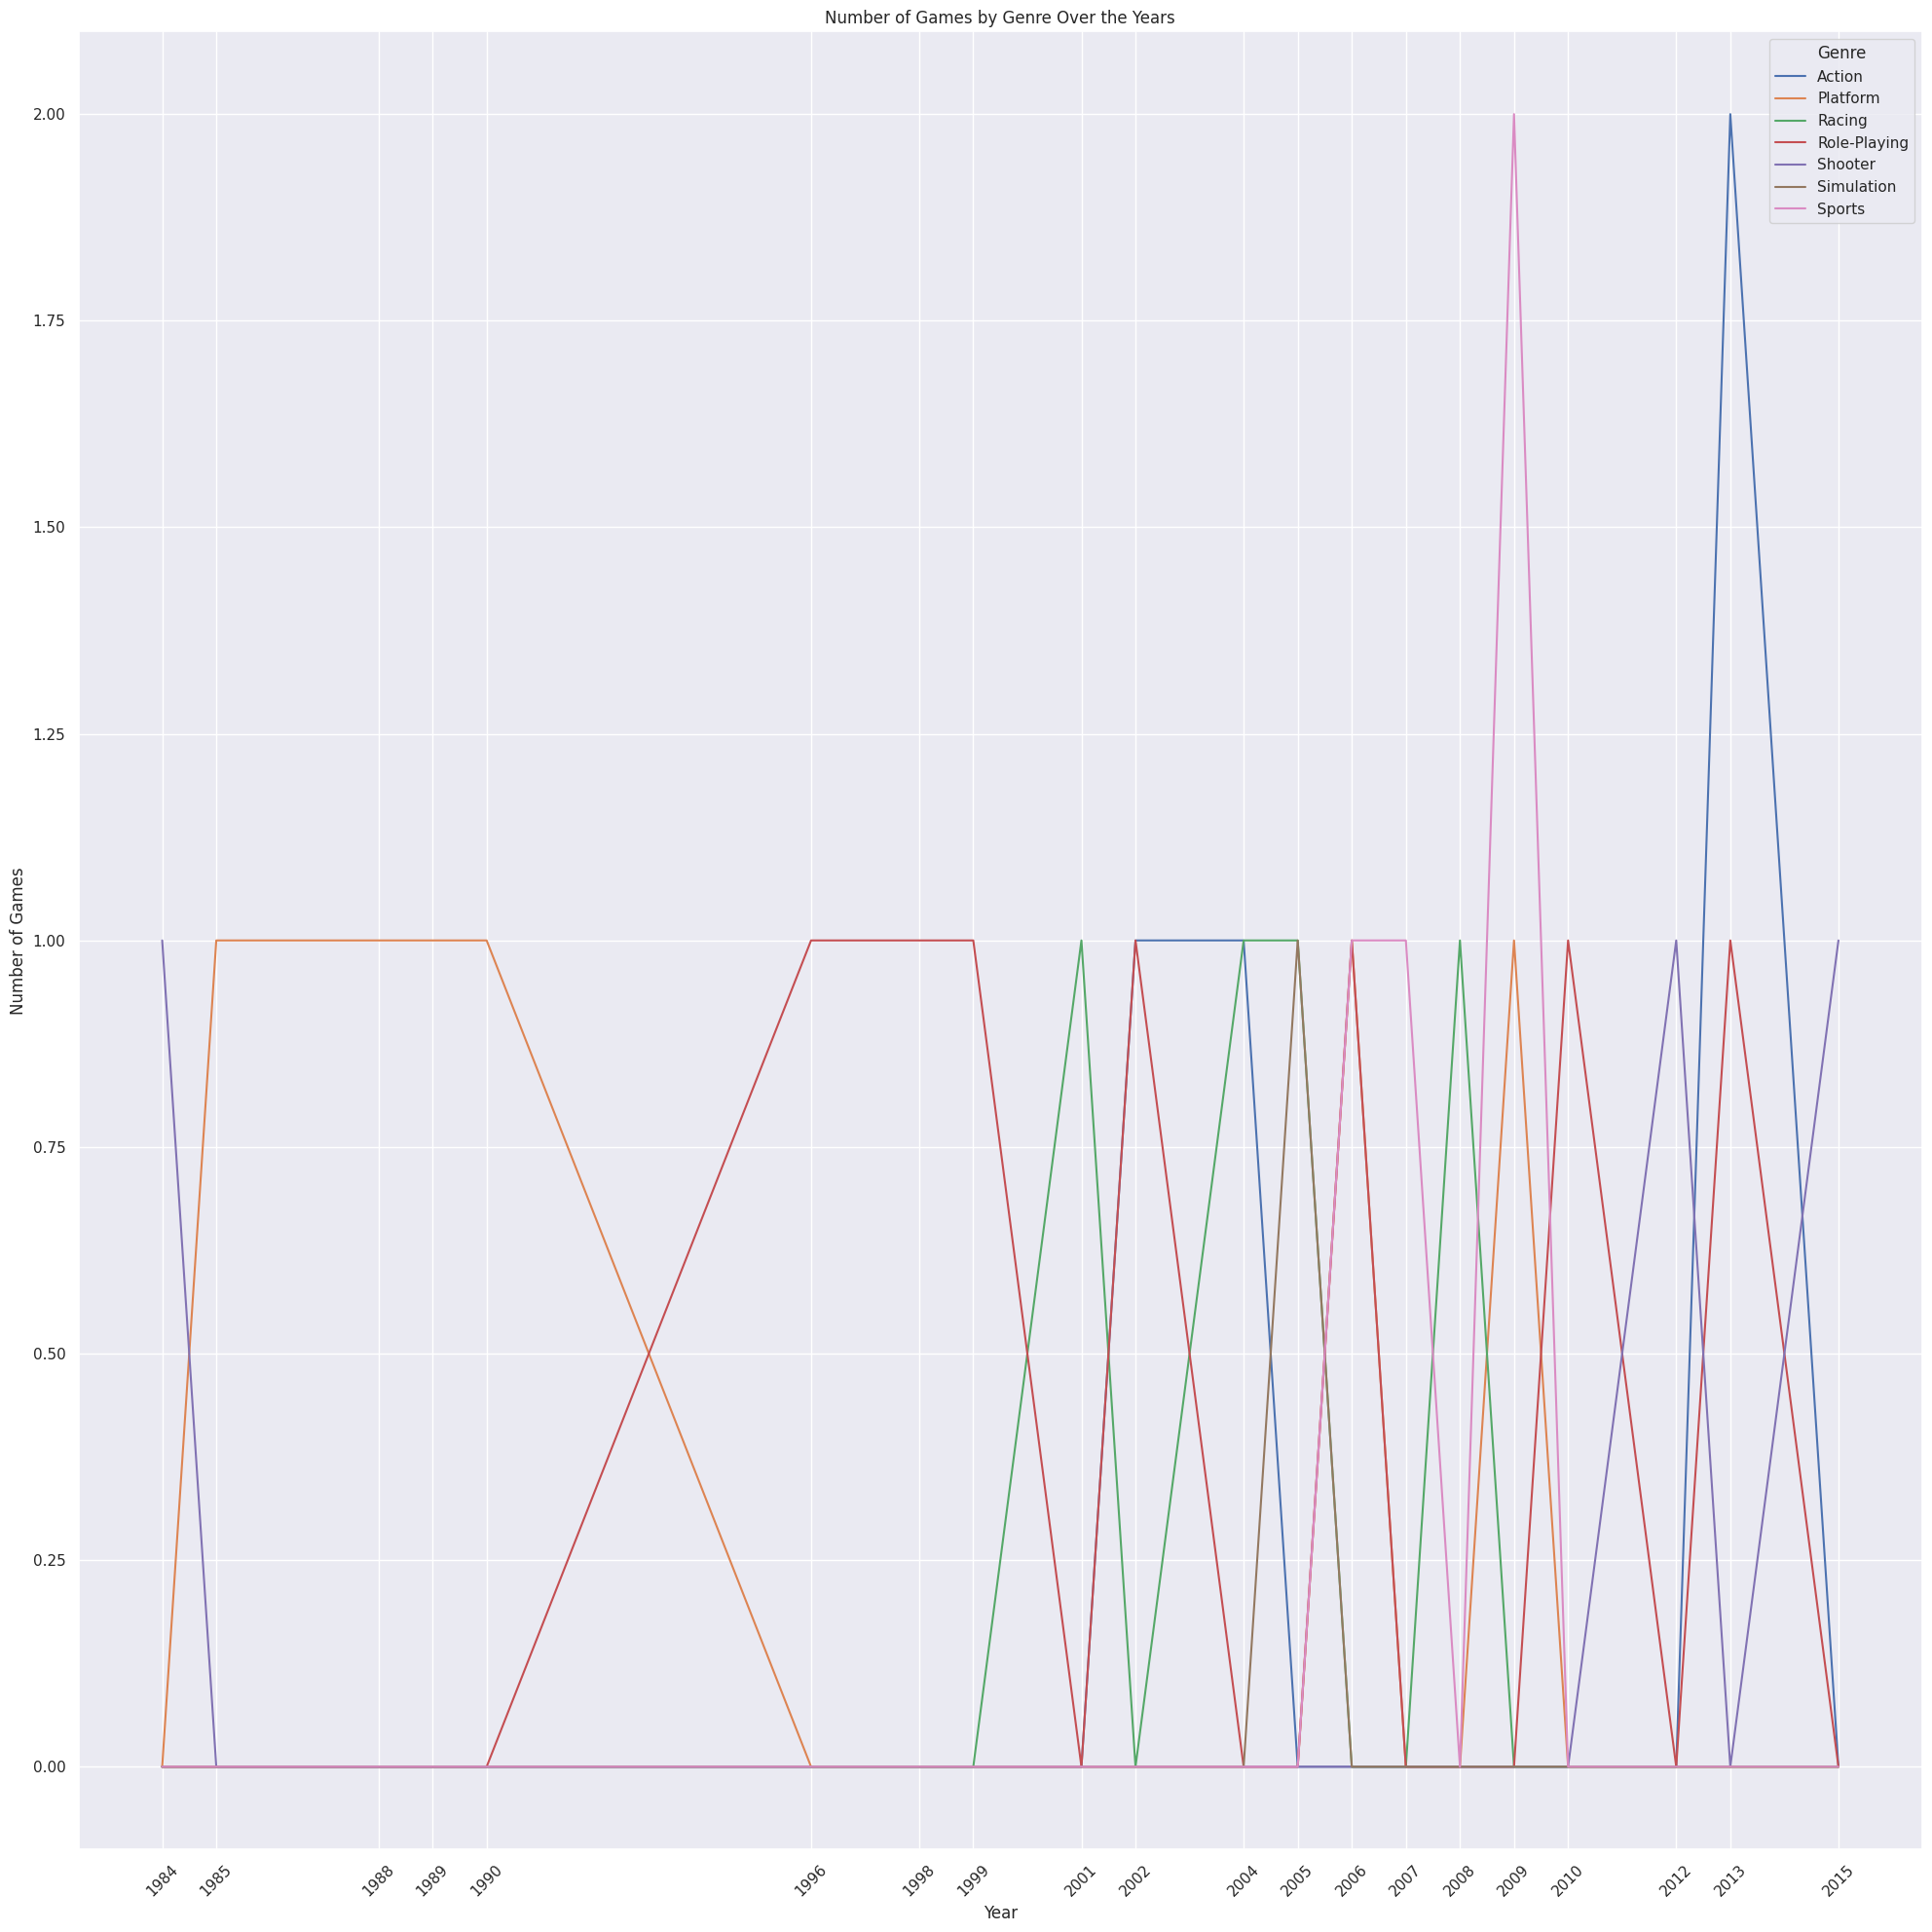

In [10]:
pivot_data = true_positive.pivot_table(index='Year', columns='Genre', aggfunc='size', fill_value=0)

plt.figure(figsize=(20, 20))
for genre in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[genre], label=genre)

plt.title('Number of Games by Genre Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.legend(title='Genre')
plt.grid(True)
plt.xticks(pivot_data.index, rotation=45)
plt.tight_layout()
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=62586f1a-5f5e-459f-afe7-2b73319ce813' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>